In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import make_scorer, accuracy_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, balanced_accuracy_score, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
import py_pcha
from sklearn.decomposition import DictionaryLearning
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [2]:
header_ = ["ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr11", "nr01", "nr02", "nr03", "nr04", "nr07", "nr08", "np01", "np04", "np05", "np07", "np08", "np09", "np10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD", "GIPER_Na", "Na_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "L_BLOOD", "ROE", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"]
print(len(header_))
df = pd.read_csv("MI.data", index_col=0, names=header_)
# Replace to NaN and convert to float
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric)

124


In [3]:
def clean_missing(data, max_row=20, max_col=30):
    col_missing = (100*data.isna().sum())/data.shape[0]
    names_dropped = list(data.loc[:, ((100*data.isna().sum())/data.shape[0])>max_col])
    data = data.loc[:, ((100*data.isna().sum())/data.shape[0])<=max_col]
    data = data.loc[((100*data.isna().sum(axis=1))/data.shape[1])<=max_row, :]
    return data, names_dropped

In [4]:
df, name_dropped = clean_missing(data=df)
print(df.shape)

(1572, 116)


In [5]:
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all()


col = 0
for column in df:
    col = col + 1
    if is_unique(df[column]):
        print('is column',col , 'unique',is_unique(df[column]))
# False

for index, row in df.iterrows():
    #print('is row',index , 'unique',is_unique(row))
    if is_unique(row):
        print('row',index , 'is unique')
print('done')

done


In [6]:
## Impute the missing values with KNN-impute

In [7]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

def impute_missing(df):

    scaler = preprocessing.StandardScaler()

    pipe = make_pipeline(scaler, KNNImputer(n_neighbors=10))

    df_i = pipe.fit_transform(df)
    df_i = scaler.inverse_transform(df_i)

    sf_df = pd.DataFrame(df_i, index=df.index, columns=df.columns)
    return sf_df

In [8]:
sf_df = impute_missing(df)

In [9]:
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all()


col = 0
for column in df:
    col = col + 1
    if is_unique(df[column]):
        print('is column',col , 'unique',is_unique(df[column]))
# False

for index, row in df.iterrows():
    #print('is row',index , 'unique',is_unique(row))
    if is_unique(row):
        print('row',index , 'is unique')
print('done')

done


In [10]:
numeric_attributes = ["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD",
                      "ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]

numeric_attributes = [x for x in numeric_attributes if x not in name_dropped]

ord_attributes = ["INF_ANAM","STENOK_AN","FK_STENOK","IBS_POST","GB","DLIT_AG","ZSN_A",
                  "ant_im","lat_im","inf_im","post_im","R_AB_1_n","NA_R_1_n","NOT_NA_1_n",
                 "R_AB_2_n","NA_R_2_n","NOT_NA_2_n","R_AB_3_n","NA_R_3_n","NOT_NA_3_n","TIME_B_S"]


ord_attributes = [x for x in ord_attributes if x not in name_dropped]

Y_labels = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]

att_names = list(df.columns)

bin_attributes = [x for x in att_names if x not in numeric_attributes+ord_attributes+Y_labels]
bin_attributes = [x for x in bin_attributes if x not in name_dropped]

In [11]:
sf_df[ord_attributes]= sf_df[ord_attributes].apply(round,axis=1)

In [12]:
sf_df[bin_attributes]= sf_df[bin_attributes].apply(round,axis=1)

In [13]:
sf_df_dum = pd.get_dummies(sf_df, columns=ord_attributes)

In [14]:
x_cols = bin_attributes+ord_attributes+numeric_attributes
y_cols = Y_labels
x_cols = [x for x in sf_df_dum.columns if x not in Y_labels]

In [15]:
X = sf_df_dum[x_cols]
Y = sf_df_dum[y_cols]
translate_dict = {0: "Alive", 1: "Cardiogenic shock", 2: "Pulmonary edema", 3: "Myocardial rupture", 4: "Progress of congestive heart failure",
                5: "Thromboembolism", 6: "Asystole", 7: "Ventricular fibrillation"}
Y["Translated_labels"] = Y["LET_IS"]
Y = Y.replace({"Translated_labels": translate_dict})
full_set = sf_df_dum[x_cols+y_cols]
Y["DEAD"] = Y["LET_IS"].apply(lambda x: 1 if x > 0 else 0)

from imblearn.over_sampling import RandomOverSampler, SMOTE
#scaler = preprocessing.StandardScaler()
#scaler.fit(full_set)
#X_sc = scaler.transform(full_set)
Y_dead = Y["DEAD"].to_numpy().astype(int)
smo = SMOTE()
x_sampled, y_sampled = smo.fit_resample(full_set, Y_dead)
x_train = x_sampled[x_cols]
x_sampled["LET_IS"] = x_sampled["LET_IS"].round(0).astype(int)
x_sampled["Translated_labels"] = x_sampled["LET_IS"]
y_train = x_sampled.replace({"Translated_labels": translate_dict})
print(y_train)


<ipython-input-15-b4d9a8b9b2e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Translated_labels"] = Y["LET_IS"]


            AGE       SEX  SIM_GIPERT  nr11  nr01  nr02  nr03  nr04  nr07  \
0     77.000000  1.000000         0.0  -0.0   0.0   0.0   0.0   0.0   0.0   
1     55.000000  1.000000         0.0  -0.0   0.0   0.0   0.0   0.0   0.0   
2     52.000000  1.000000         0.0  -0.0   0.0   0.0   0.0   0.0   0.0   
3     68.000000  0.000000         0.0  -0.0   0.0   0.0   0.0   0.0   0.0   
4     60.000000  1.000000         0.0  -0.0   0.0   0.0   0.0   0.0   0.0   
...         ...       ...         ...   ...   ...   ...   ...   ...   ...   
2641  74.665856  0.444715         0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2642  75.000000  0.012008         0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2643  62.080675  0.026892         0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2644  60.879904  0.224019         0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2645  65.254300  0.563575         0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      nr08  ...  FIBR_JELUD  A_V_BLOK  OTEK_LANC    RAZRIV  DRESSLER  ZSN  

In [16]:
def make_2d_graphs(X, labels, dimensions, title, xlabel, ylabel):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel(ylabel, fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = ["Alive", "Cardiogenic shock", "Pulmonary edema", "Myocardial rupture", "Progress of congestive heart failure",
                "Thromboembolism", "Asystole", "Ventricular fibrillation"]
    colors = ['r', 'g', 'b', "y", "m", "c", "k"]
    for target, color in zip(targets,colors):
        indicesToKeep = labels["Translated_labels"] == target
        print(X[indicesToKeep, dimensions[0]].flatten("K").shape, X[indicesToKeep, dimensions[1]].flatten("K").shape)
        ax.scatter(X[indicesToKeep, dimensions[0]].tolist()
                   , X[indicesToKeep, dimensions[1]].tolist()
                   , c = color, alpha=0.5)
    ax.legend(targets)
    ax.grid()
    
def hist(x, labels=["Alive", "Cardiogenic shock", "Pulmonary edema", "Myocardial rupture", "Progress of congestive heart failure",
                "Thromboembolism", "Asystole", "Ventricular fibrillation"]):
    keys, counts = np.unique(x, return_counts=True)
    plt.bar(keys,counts)
    plt.xticks(rotation=90)
    plt.show()

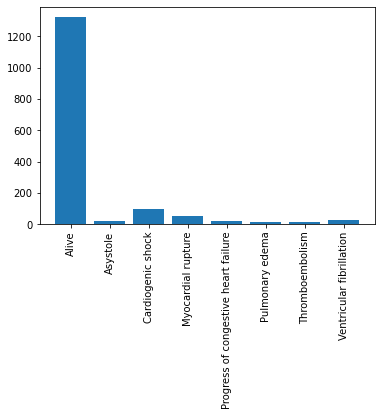

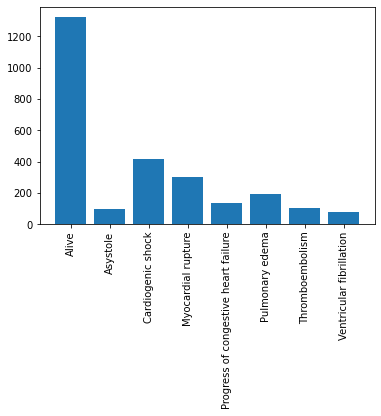

In [17]:
hist(Y["Translated_labels"])
hist(y_train["Translated_labels"])

In [18]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler

def center_data(X):
    mu = np.mean(X.T, axis = 1)
    # center the data
    Xc = X - mu
    return Xc

def PCA_EVD(X):
    # Compute PCA as an eigenvalue analysis of the covariance matrix
    Eval, Evec = np.linalg.eig(np.cov(X))

    # Sort while still keeping the imaginary part, therefor lexicographic sorting
    # Also, descending sort
    sortIndex = np.argsort(Eval)[::-1] 

    Eval = Eval[sortIndex].astype(np.float64) # Away with imaginary part (~0) and order
    Evec = Evec[:, sortIndex].astype(np.float64)

    # Discard strictly none-positive eigenvalues modes
    Eval = Eval[np.where(Eval > 1e-9)]
    Evec = Evec[:, 0: len(Eval)]
    return Eval, Evec

def PCA_SVD(Xc):
    U, d, V = np.linalg.svd(Xc) #Computes U @ diag(d) @ V. So remember to take the complex conjugate of V
    d = d[np.where(d > 1e-9)]
    k = len(d)
    U = U[:,:k]
    V = V.T[:,:k]
    return d, V

def PCA_skl(X):
    x = StandardScaler().fit_transform(X)
    pca = PCA()
    principalComponents = pca.fit_transform(x)
    return principalComponents   

def SparsePCA_skl(X):
    sparsepca = SparsePCA(n_components=4, random_state=123)
    return sparsepca.fit_transform(X)
    

    

(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)
(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)
(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)
(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)


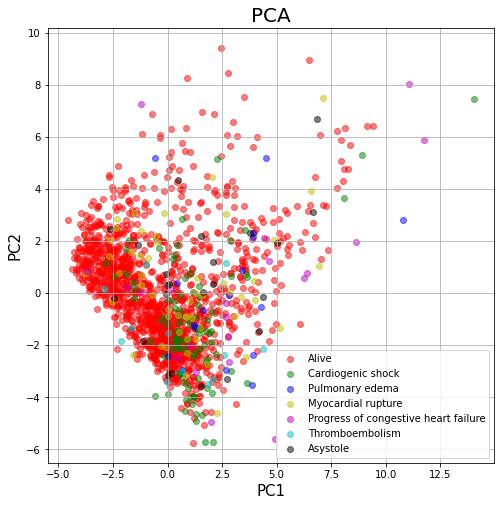

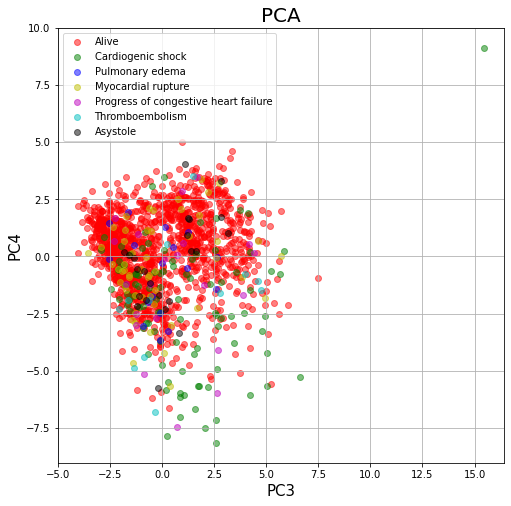

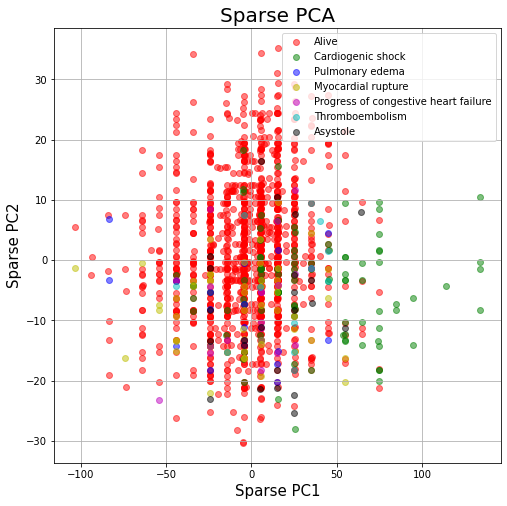

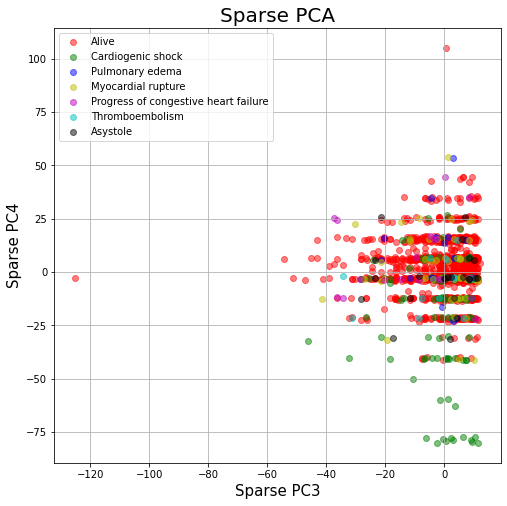

In [19]:
#eval, evec = PCA_EVD(center_data(X))
#print(eval.shape, evec.shape, X.shape)
#Project data
new_pca=PCA_skl(X)
make_2d_graphs(new_pca, Y, dimensions=[0,1], title="PCA", xlabel="PC1", ylabel="PC2")
make_2d_graphs(new_pca, Y, dimensions=[2,3], title="PCA", xlabel="PC3", ylabel="PC4")
new_sparsepca = SparsePCA_skl(X) #This takes some time ;)
make_2d_graphs(new_sparsepca, Y, dimensions=[0,1], title="Sparse PCA", xlabel="Sparse PC1", ylabel="Sparse PC2")
make_2d_graphs(new_sparsepca, Y, dimensions=[2,3], title="Sparse PCA", xlabel="Sparse PC3", ylabel="Sparse PC4")

(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)


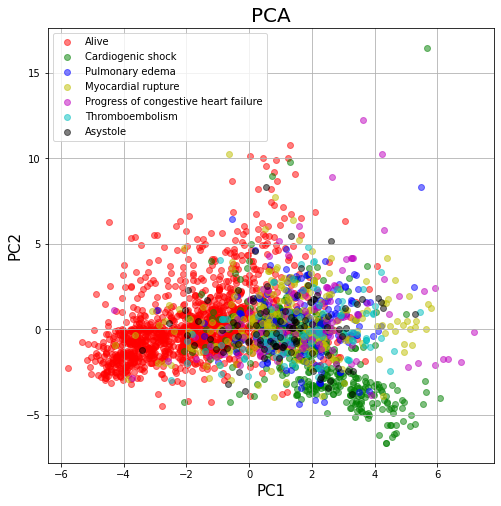

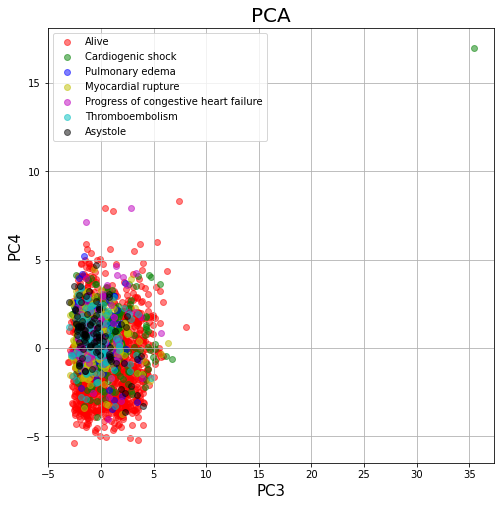

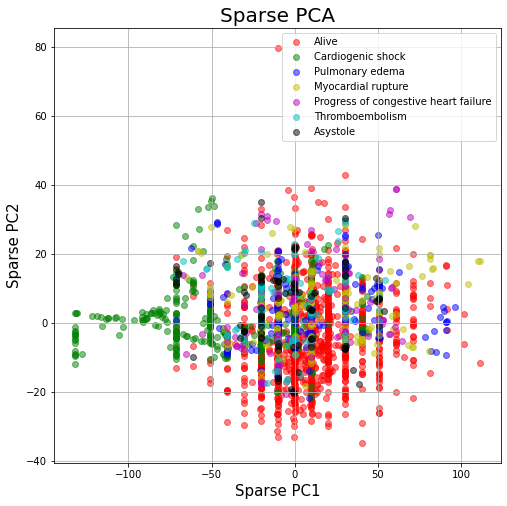

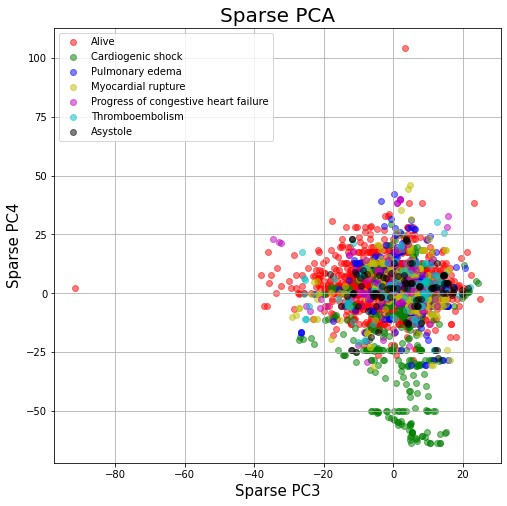

In [20]:
#Project data
new_pca=PCA_skl(x_train)
make_2d_graphs(new_pca, y_train, dimensions=[0,1], title="PCA", xlabel="PC1", ylabel="PC2")
make_2d_graphs(new_pca, y_train, dimensions=[2,3], title="PCA", xlabel="PC3", ylabel="PC4")
new_sparsepca = SparsePCA_skl(x_train) #This takes some time ;)
make_2d_graphs(new_sparsepca, y_train, dimensions=[0,1], title="Sparse PCA", xlabel="Sparse PC1", ylabel="Sparse PC2")
make_2d_graphs(new_sparsepca, y_train, dimensions=[2,3], title="Sparse PCA", xlabel="Sparse PC3", ylabel="Sparse PC4")

In [21]:
eval, evec = PCA_SVD(center_data(X))
print(eval.shape, evec.shape, X.shape)

(161,) (184, 161) (1572, 184)


In [22]:
from sklearn.decomposition import NMF

def NMF_data(data, n_components=None):
    if n_components is None:
        model = NMF(init='random', random_state=0)
    else:
        model = NMF(n_components=n_components, init='random', random_state=0)
    X_train_transformed = model.fit_transform(data)
    L = 0.5*model.reconstruction_err_**2
    components = model.components_
    return X_train_transformed

/Users/ayoebuus/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(2646, 8) [[2.78868413e+00 1.57737787e-01 6.07820550e-01 ... 9.22884659e-02
  1.70020607e+01 6.01865013e-03]
 [2.17793081e+00 1.16779368e-02 4.35215351e-01 ... 8.79862294e-02
  3.06511647e-01 1.35299884e-01]
 [2.18132280e+00 9.65469061e-02 3.20535273e+00 ... 0.00000000e+00
  4.84853626e+00 7.49372497e-02]
 ...
 [2.54807708e+00 3.76971897e-02 2.98378407e+00 ... 1.20787856e-02
  7.85805382e+00 8.23878430e-04]
 [1.89775624e+00 7.63374654e-02 9.70273740e-02 ... 2.26530327e-01
  5.39772855e-01 1.66904155e-01]
 [2.52127967e+00 7.48192701e-02 8.97410474e-01 ... 9.41813011e-02
  9.45913892e+00 7.63270856e-02]]
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,

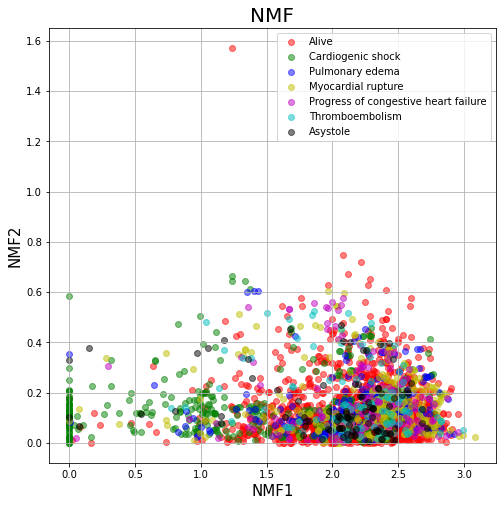

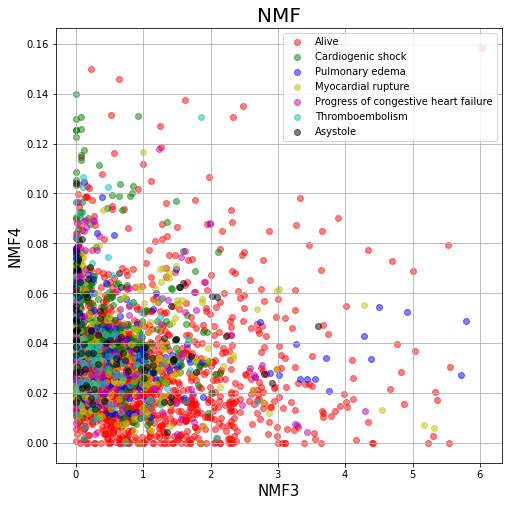

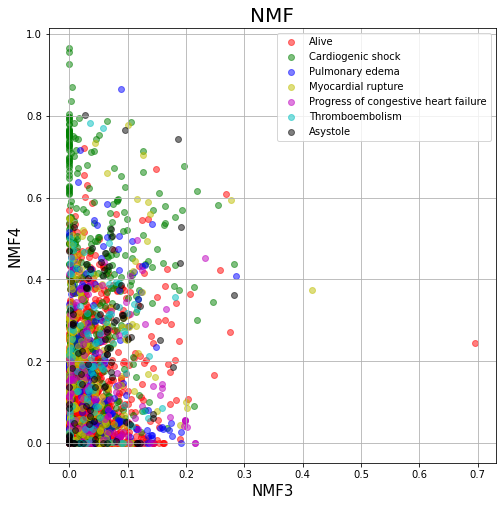

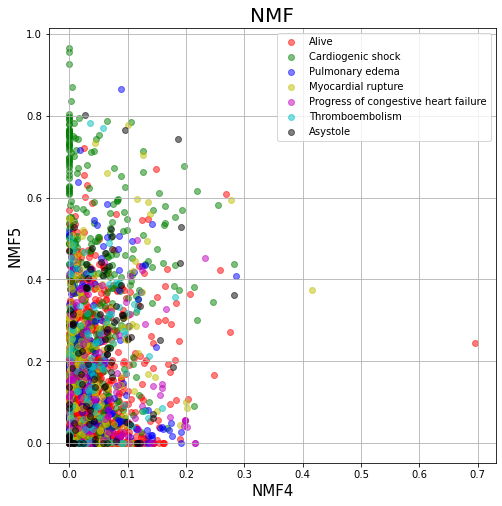

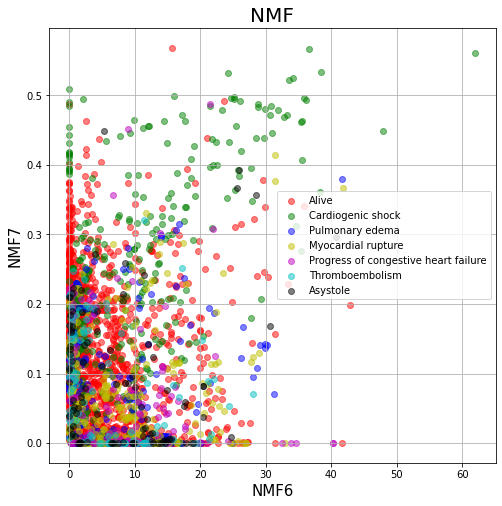

In [23]:
new_nmf=NMF_data(x_train, n_components=8)
print(new_nmf.shape, new_nmf)
make_2d_graphs(new_nmf, y_train, dimensions=[0,1], title="NMF", xlabel="NMF1", ylabel="NMF2")
make_2d_graphs(new_nmf, y_train, dimensions=[2,3], title="NMF", xlabel="NMF3", ylabel="NMF4")
make_2d_graphs(new_nmf, y_train, dimensions=[4,5], title="NMF", xlabel="NMF3", ylabel="NMF4")
make_2d_graphs(new_nmf, y_train, dimensions=[4,5], title="NMF", xlabel="NMF4", ylabel="NMF5")
make_2d_graphs(new_nmf, y_train, dimensions=[6,7], title="NMF", xlabel="NMF6", ylabel="NMF7")

In [24]:
import py_pcha

def aa_data(x, n_components=None):
    xx=x.to_numpy().T
    XC, S, C, SSE, varexpl = py_pcha.PCHA(xx,noc=n_components, delta=0.1)
    return S.T

(2646, 4) [[0.80430066 0.13880727 0.         0.05689208]
 [0.15800222 0.26356327 0.57843451 0.        ]
 [0.42244668 0.03132896 0.52560625 0.02061812]
 ...
 [0.68711352 0.         0.31288648 0.        ]
 [0.19605303 0.41769396 0.36073923 0.02551378]
 [0.56417865 0.19779879 0.23143608 0.00658648]]
(1, 1323) (1, 1323)
(1, 416) (1, 416)
(1, 190) (1, 190)
(1, 301) (1, 301)
(1, 136) (1, 136)
(1, 106) (1, 106)
(1, 98) (1, 98)
(1, 1323) (1, 1323)
(1, 416) (1, 416)
(1, 190) (1, 190)
(1, 301) (1, 301)
(1, 136) (1, 136)
(1, 106) (1, 106)
(1, 98) (1, 98)


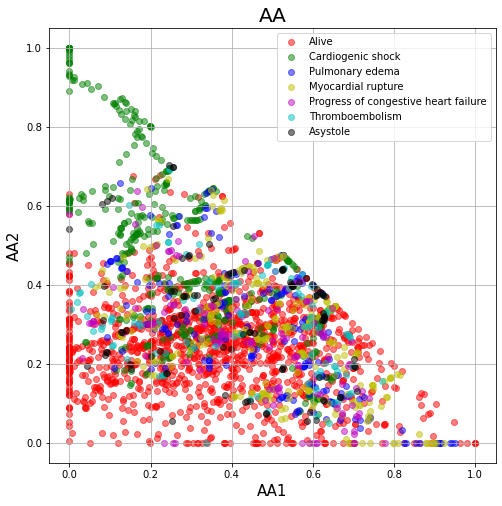

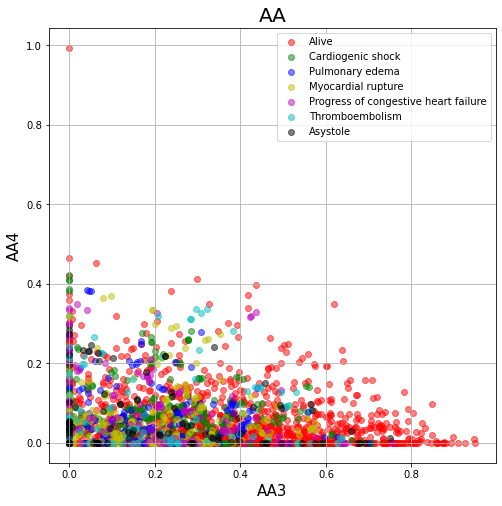

In [25]:
new_aa = aa_data(x_train, n_components=4)
print(new_aa.shape, new_aa)
make_2d_graphs(new_aa, y_train, dimensions=[0,1], title="AA", xlabel="AA1", ylabel="AA2")
make_2d_graphs(new_aa, y_train, dimensions=[2,3], title="AA", xlabel="AA3", ylabel="AA4")


In [26]:
from sklearn.decomposition import DictionaryLearning

def sc_data(x, n_components=4):
    model = DictionaryLearning(n_components=n_components, alpha=0.1, transform_alpha=0.1, max_iter=100, transform_max_iter=100, fit_algorithm='cd', transform_algorithm='lasso_cd')
    X_train_transformed = model.fit_transform(x)
    return X_train_transformed

(2646, 4) [[0.80430066 0.13880727 0.         0.05689208]
 [0.15800222 0.26356327 0.57843451 0.        ]
 [0.42244668 0.03132896 0.52560625 0.02061812]
 ...
 [0.68711352 0.         0.31288648 0.        ]
 [0.19605303 0.41769396 0.36073923 0.02551378]
 [0.56417865 0.19779879 0.23143608 0.00658648]]
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)
(1323,) (1323,)
(416,) (416,)
(190,) (190,)
(301,) (301,)
(136,) (136,)
(106,) (106,)
(98,) (98,)


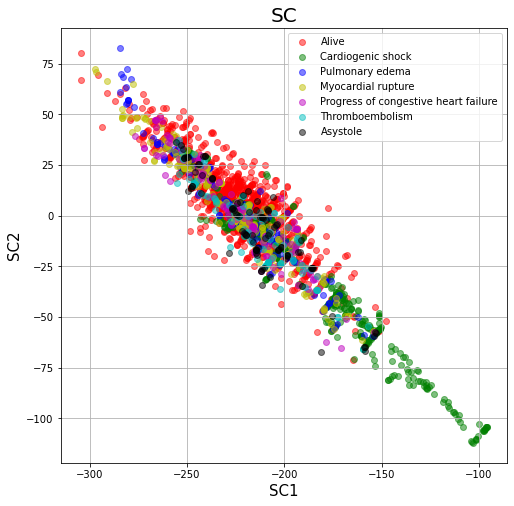

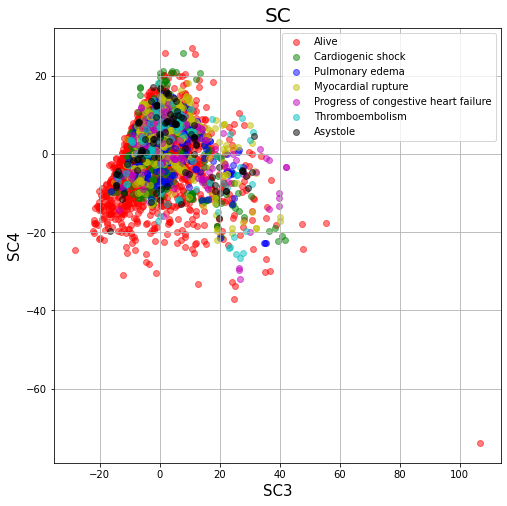

In [27]:
new_sc = sc_data(x_train, n_components=4)
print(new_aa.shape, new_aa)
make_2d_graphs(new_sc, y_train, dimensions=[0,1], title="SC", xlabel="SC1", ylabel="SC2")
make_2d_graphs(new_sc, y_train, dimensions=[2,3], title="SC", xlabel="SC3", ylabel="SC4")


In [31]:
X = sf_df_dum[x_cols]
Y = sf_df_dum[y_cols]
Y["DEAD"] = Y["LET_IS"].apply(lambda x: 1 if x > 0 else 0)
Y_dead = Y["DEAD"].to_numpy()
Y_dead = Y_dead.round().astype(int)
X = X.to_numpy()
print(X)

[[77.  1.  0. ...  0.  0.  0.]
 [55.  1.  0. ...  0.  0.  0.]
 [52.  1.  0. ...  0.  0.  0.]
 ...
 [70.  0.  0. ...  0.  0.  0.]
 [79.  0.  0. ...  0.  0.  0.]
 [63.  1.  0. ...  0.  0.  0.]]


<ipython-input-31-65f5eded5cd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["DEAD"] = Y["LET_IS"].apply(lambda x: 1 if x > 0 else 0)


{0: 1.75, 1: 0.25}
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 1.75, 1: 0.25}, degree=1,
                     max_iter=10000))])
best parameters: {'classifier__C': 100, 'classifier__class_weight': {0: 1.75, 1: 0.25}, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
best score: 0.9644444444444443
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 1.75, 1: 0.25}, degree=1,
                     max_iter=10000))])
best parameters: {'classifier__C': 100, 'classifier__class_weight': {0: 1.75, 1: 0.25}, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
best score: 0.9652095927472767
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, c

/Users/ayoebuus/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 1.5, 1: 0.5}, degree=1,
                     max_iter=10000))])
best parameters: {'classifier__C': 100, 'classifier__class_weight': {0: 1.5, 1: 0.5}, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
best score: 0.9641718859123316
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 1.5, 1: 0.5}, degree=1,
                     max_iter=10000))])
best parameters: {'classifier__C': 100, 'classifier__class_weight': {0: 1.5, 1: 0.5}, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
best score: 0.9685446009389671
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 1.5, 1: 0.5

Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 0.5, 1: 1.5}, degree=1,
                     max_iter=10000))])
best parameters: {'classifier__C': 100, 'classifier__class_weight': {0: 0.5, 1: 1.5}, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
best score: 0.9686392340973948
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 0.5, 1: 1.5}, degree=1,
                     max_iter=10000))])
best parameters: {'classifier__C': 100, 'classifier__class_weight': {0: 0.5, 1: 1.5}, 'classifier__degree': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
best score: 0.961006289308176
Fitting 15 folds for each of 6 candidates, totalling 90 fits
best estimator: Pipeline(steps=[('classifier',
                 SVC(C=100, class_weight={0: 0.5, 1: 1.5}

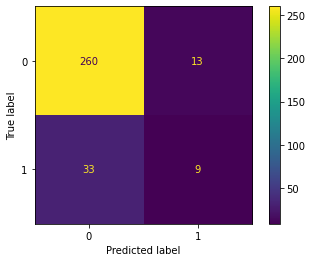

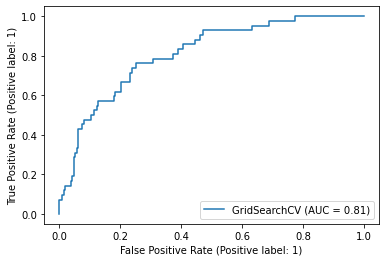

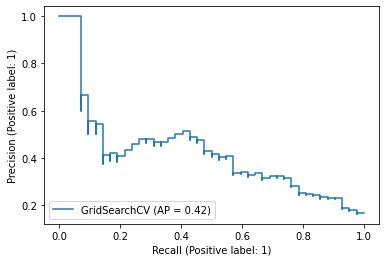

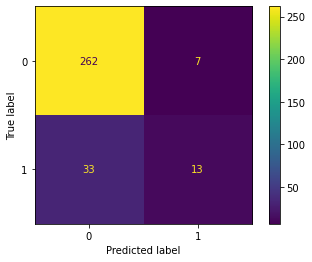

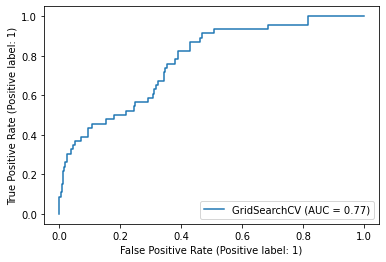

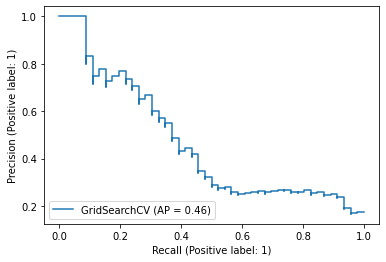

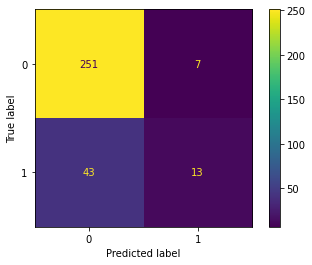

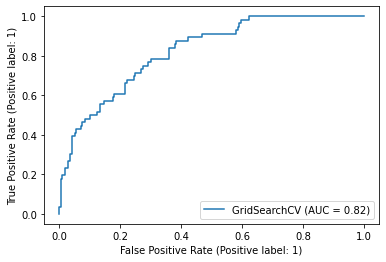

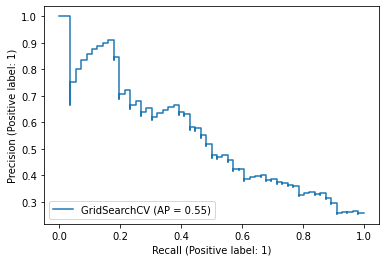

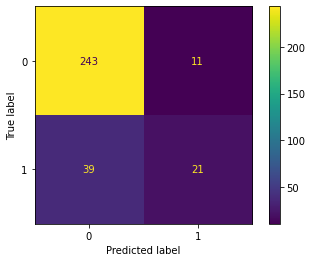

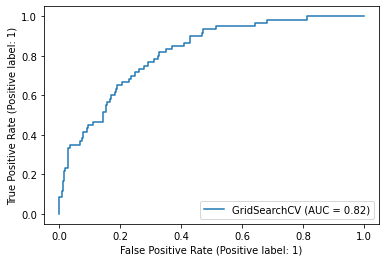

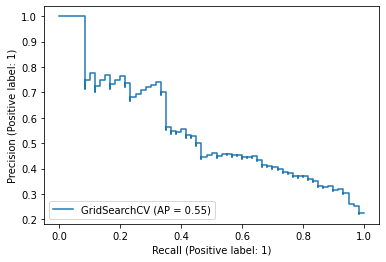

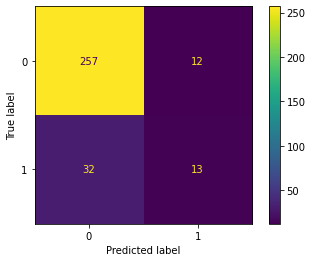

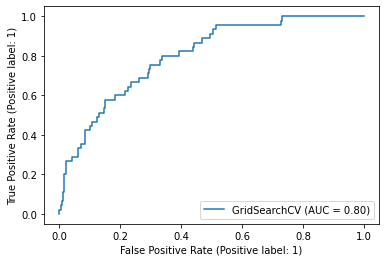

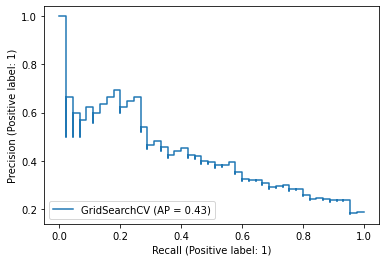

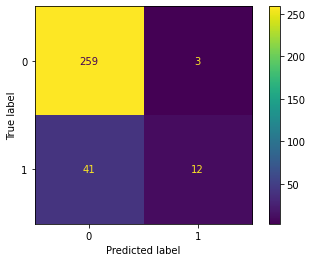

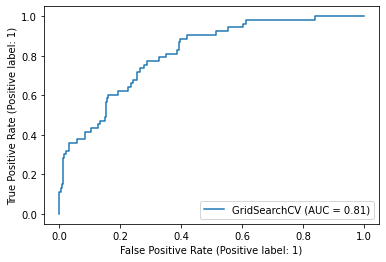

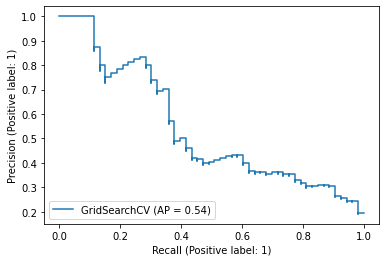

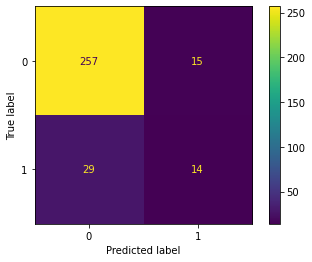

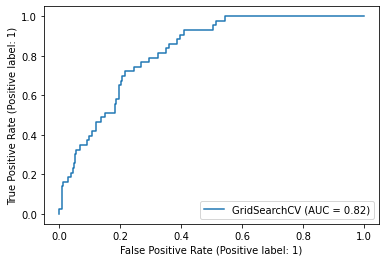

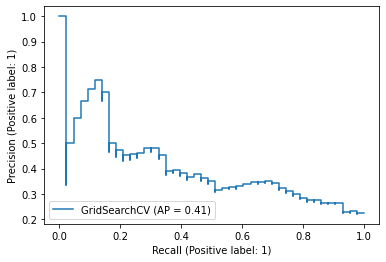

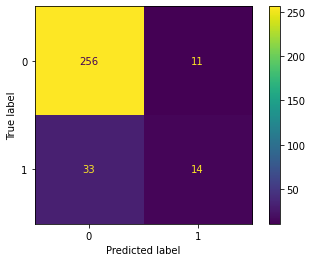

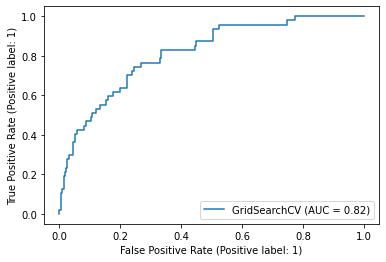

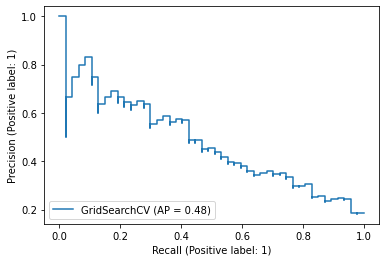

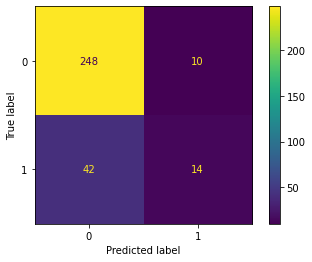

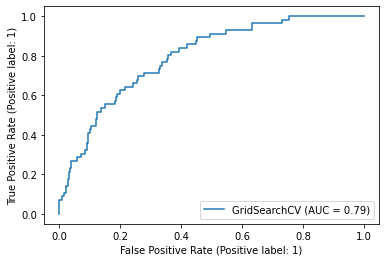

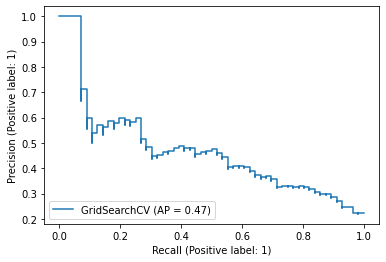

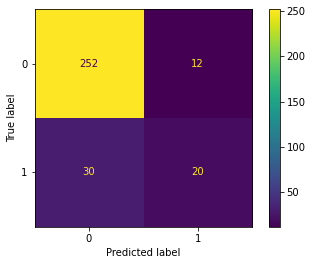

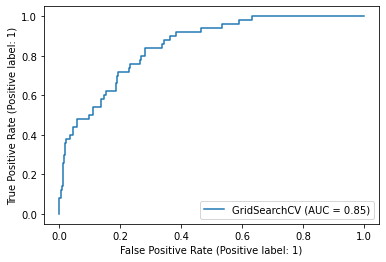

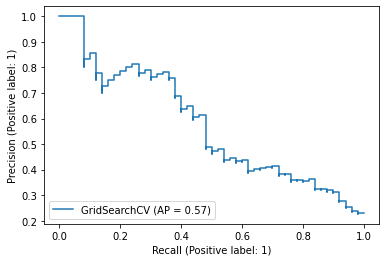

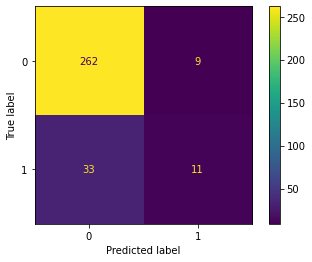

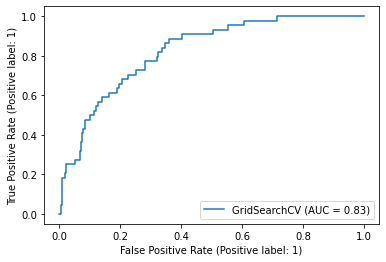

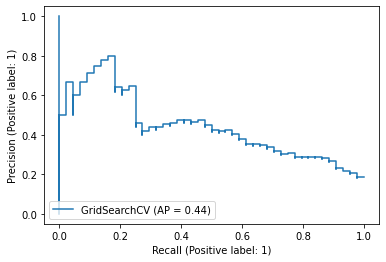

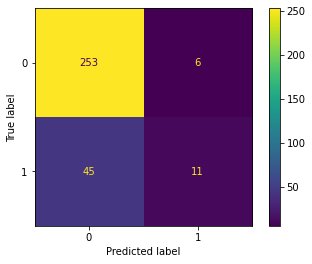

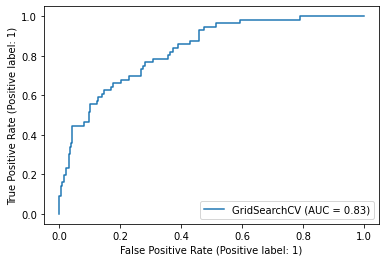

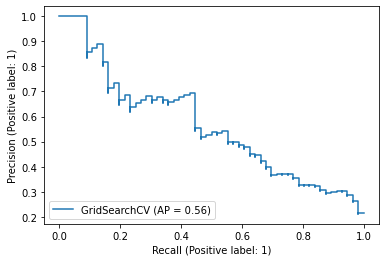

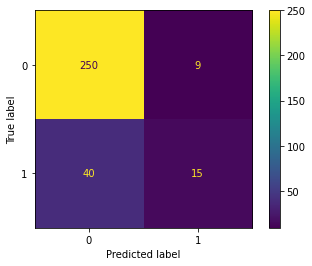

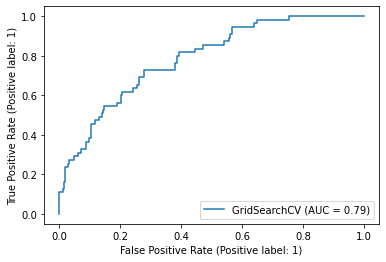

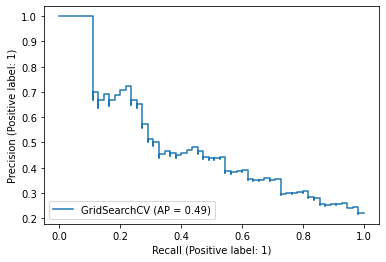

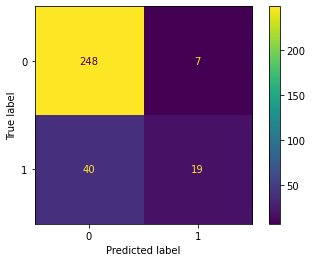

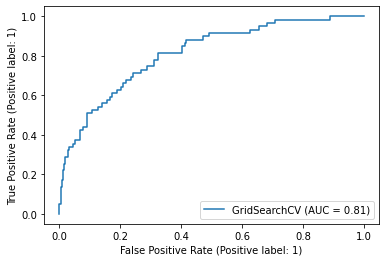

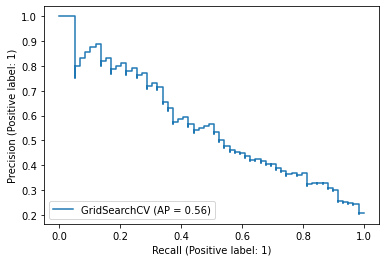

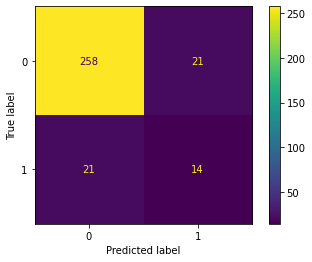

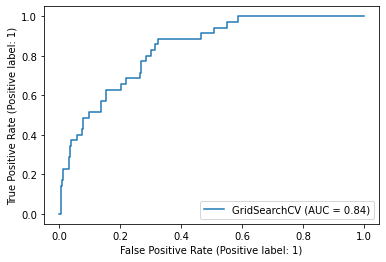

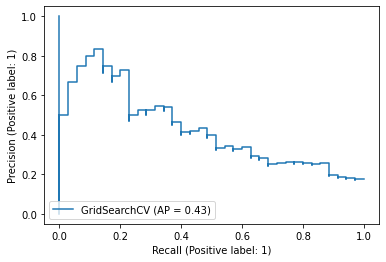

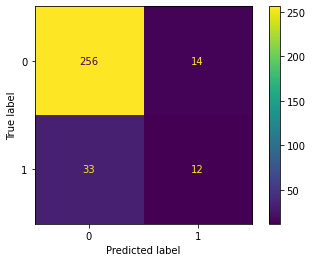

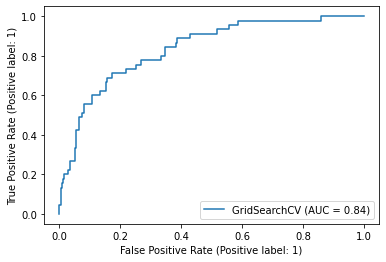

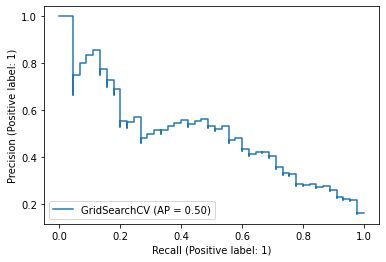

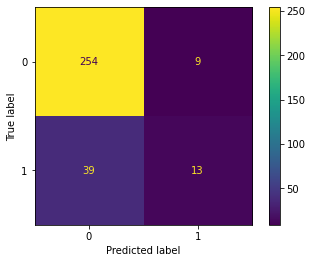

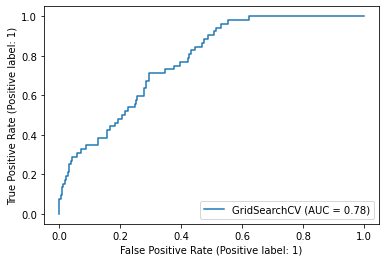

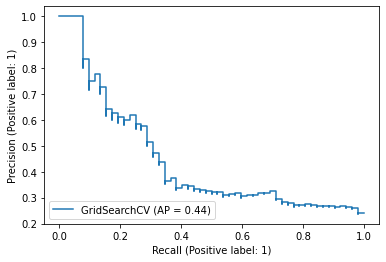

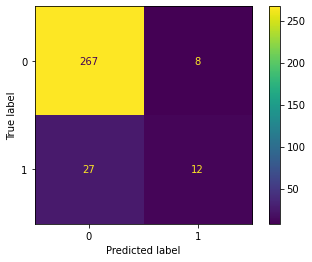

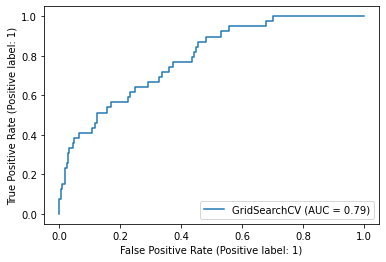

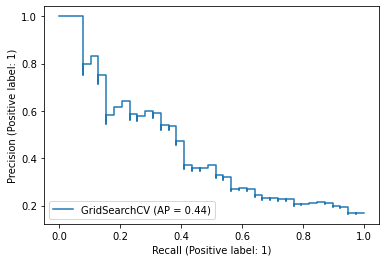

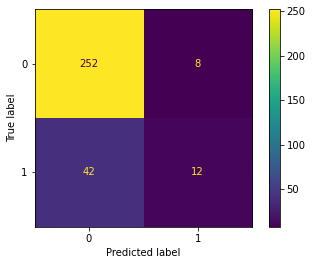

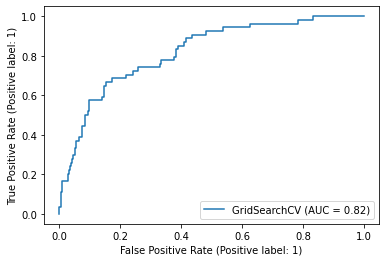

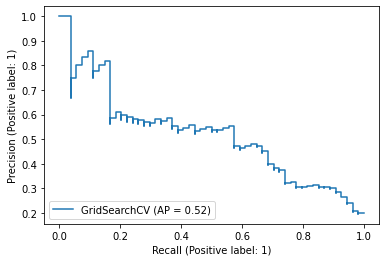

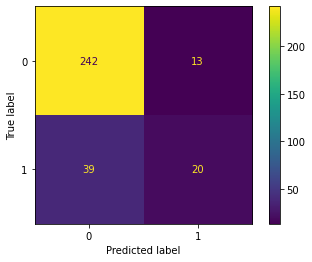

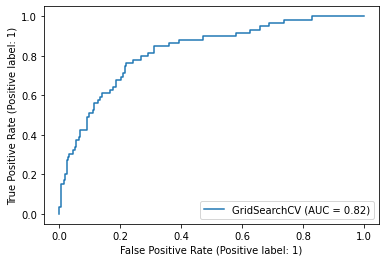

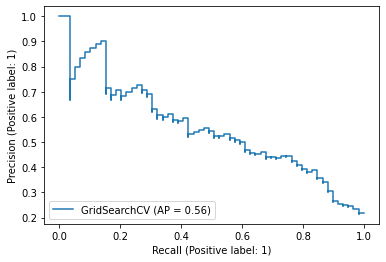

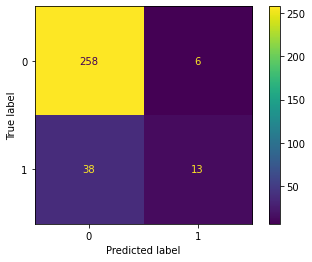

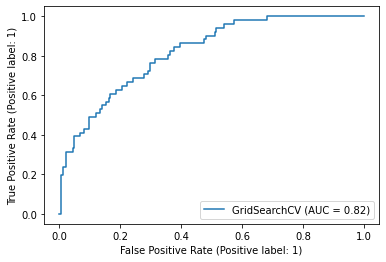

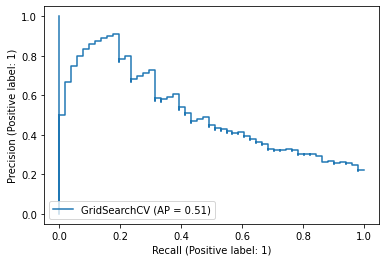

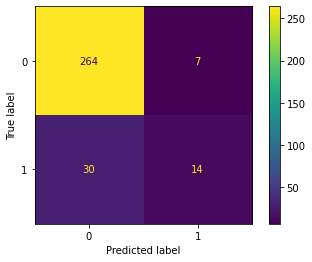

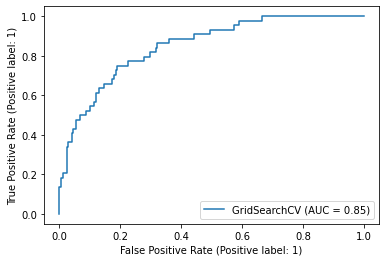

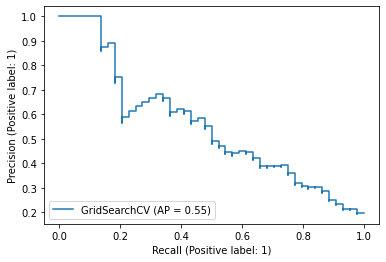

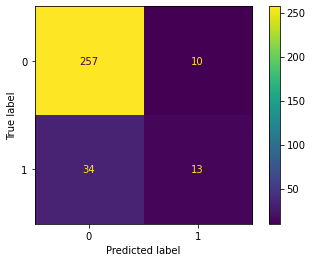

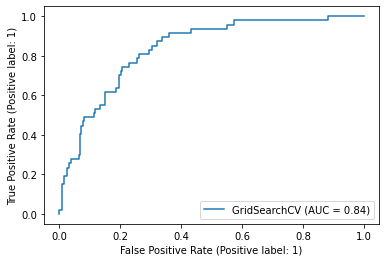

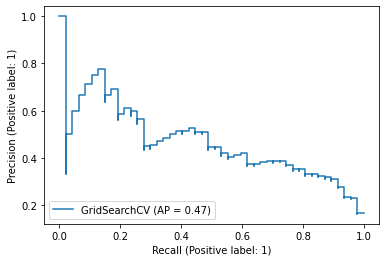

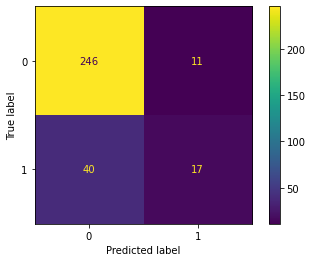

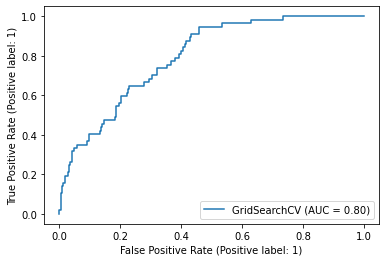

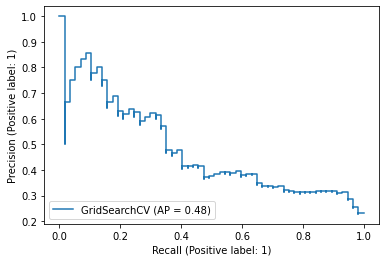

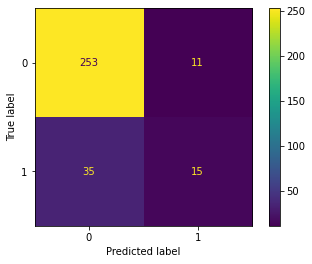

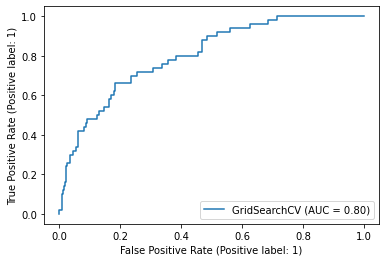

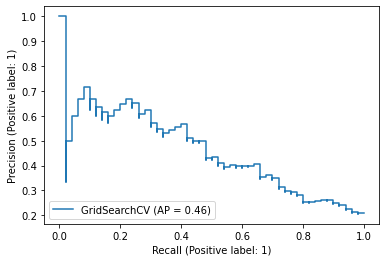

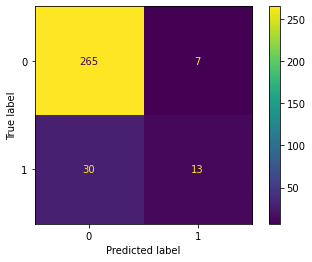

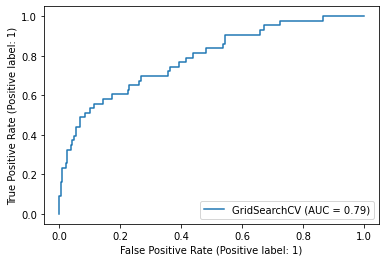

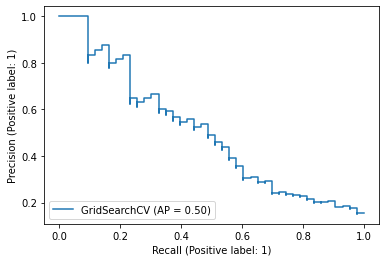

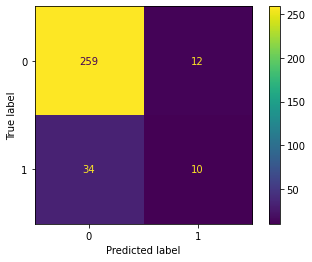

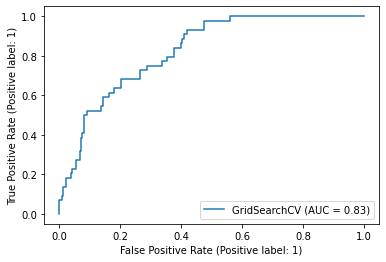

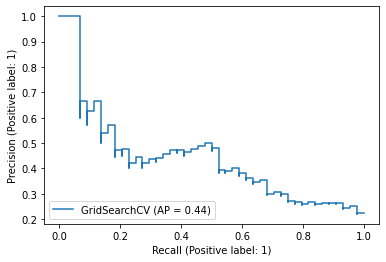

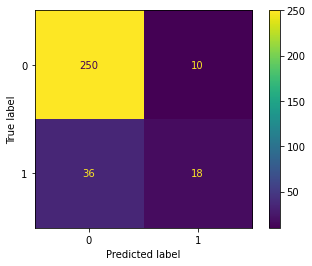

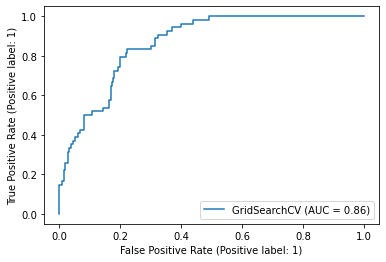

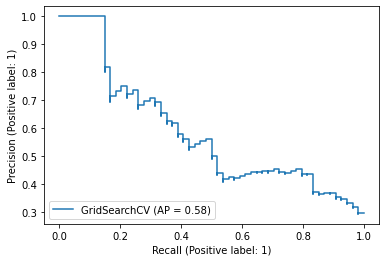

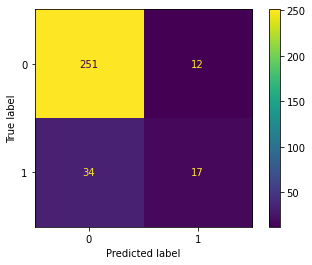

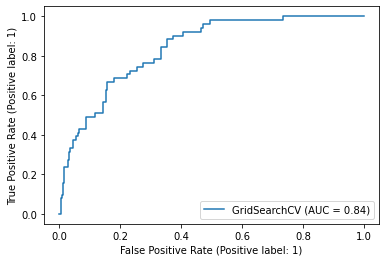

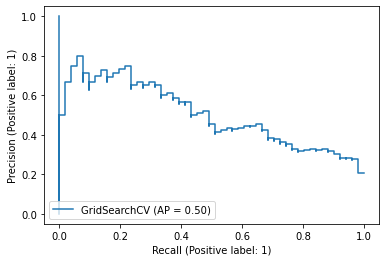

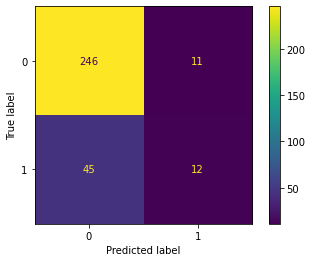

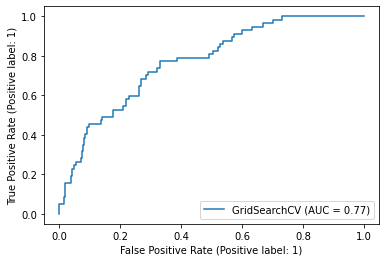

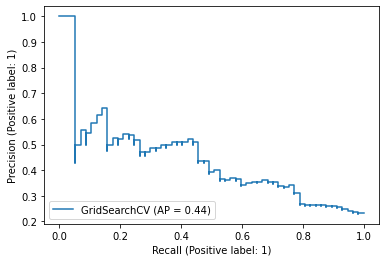

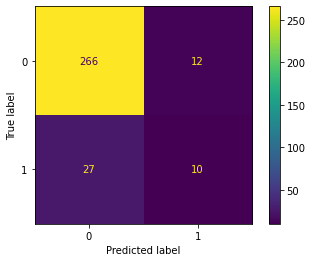

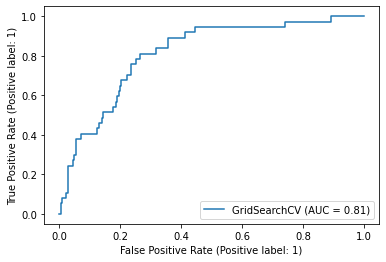

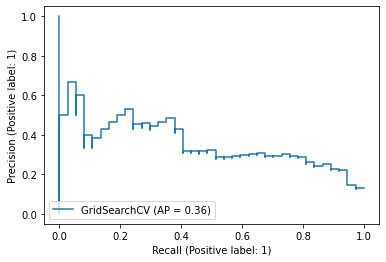

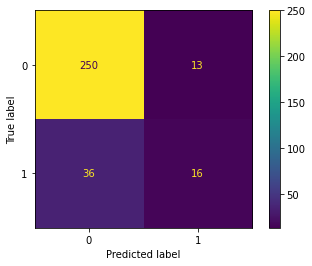

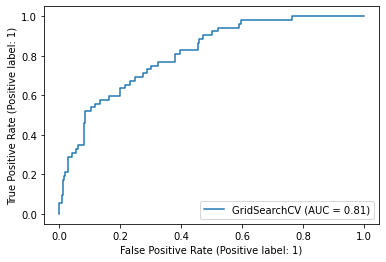

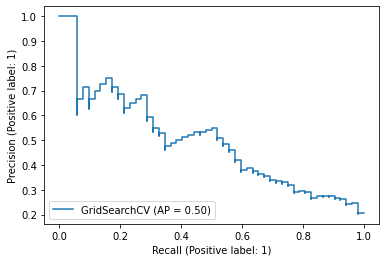

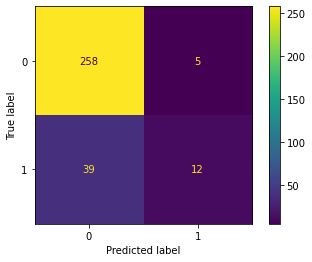

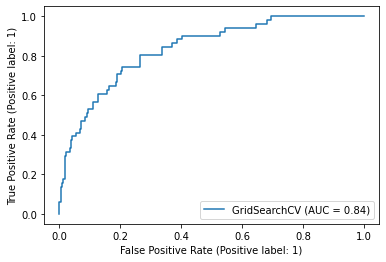

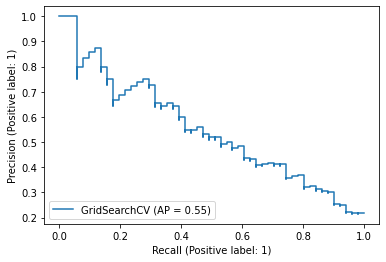

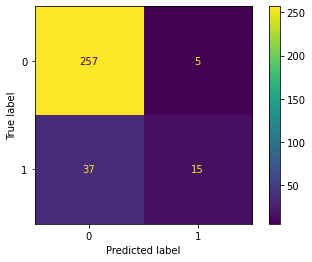

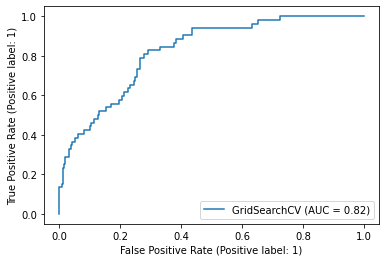

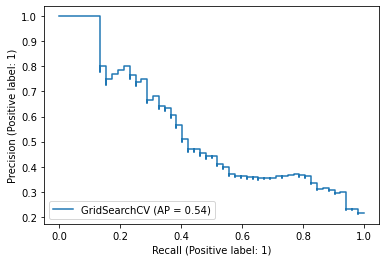

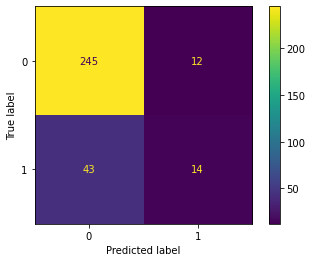

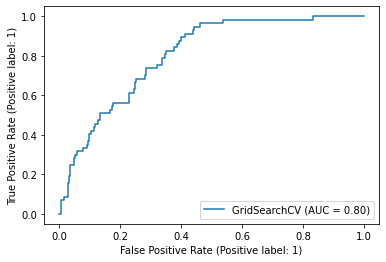

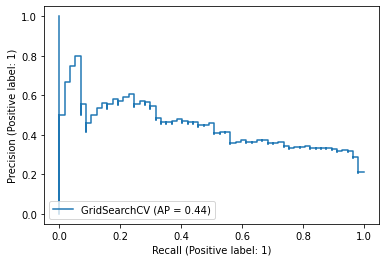

In [221]:
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score, confusion_matrix, accuracy_score

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []
scaler = preprocessing.StandardScaler()
bestscoresCWaccuracy = []
bestscoresCWroc_auc = []
bestscoresCWsensitivity = []
bestscoresCWspecificity = []

classweight = [{0: 1.75, 1: .25}, {0: 1.5, 1: .5}, {0: 1.25, 1: .75}, {0: 1, 1:1}, 
               {0: .75, 1: 1.25}, {0: .5, 1: 1.5}, {0: 0.25, 1: 1.75}]

for cw in classweight:
    print(cw)
    bestscoresCV = []


    for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X)):
        x_train_cv, x_test_cv = X[train_ids],X[test_ids]
        y_train_cv, y_test_cv = Y_dead[train_ids],Y_dead[test_ids]
        scaler.fit(X)
        x_train_cvsc = scaler.transform(x_train_cv)
        x_test_cvsc = scaler.transform(x_test_cv)
        smo = SMOTE()
        x_train, y_train = smo.fit_resample(x_train_cvsc, y_train_cv)

        param_grid = {
            'classifier__degree': [1, 2, 3], #1, 2, 5 ## 1 prefered
            "classifier__gamma": ["scale"], #"auto", ## scale prefered
            "classifier__C": [100], #10, 50, 100, 1000, 5000, 10000 ## lowest is always prefered 
            "classifier__class_weight": [cw], #[{0: 1.75, 1: .25}, {0: 1.5, 1: .5}, {0: 1.25, 1: .75}, {0: 1, 1:1}, 
                                         #{0: .75, 1: 1.25}, {0: .5, 1: 1.5}, {0: 0.25, 1: 1.75}],
                         #[{0: 1, 1: 100}, {0: 1, 1: 50}, {0: 1, 1: 5}, {0: 1, 1: 1}],#["balanced"],
            "classifier__kernel": ["linear",  "rbf"] ## rbf prefered
            }

        model = Pipeline([
                          ("classifier",SVC(max_iter=10000,))
                        ])
    
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

        cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose=2, n_jobs=-1,scoring="accuracy")#roc_auc

        cv_grid.fit(x_train, y_train)
        print(f'best estimator: {cv_grid.best_estimator_}')
        print(f'best parameters: {cv_grid.best_params_}')
        print(f'best score: {cv_grid.best_score_}')
        bestscoresCV.append(cv_grid.best_score_)
        #print(f'best class weight: {cv_grid.best_class_weight_}')

        y_pred = cv_grid.predict(x_test_cvsc)
        plot_confusion_matrix(cv_grid, x_test_cvsc, y_test_cv)  
        scores.append(balanced_accuracy_score(y_pred,y_test_cv))
        bas = balanced_accuracy_score(y_pred,y_test_cv)
        
        tn, fp, fn, tp = confusion_matrix(y_test_cv,y_pred).ravel()
        
        sen = (tp/(tp+fn))
        spe = (tn/(tn+fp))
    
        metrics.plot_roc_curve(cv_grid, x_test_cvsc, y_test_cv)
        fpr, tpr, thresholds = metrics.roc_curve(y_test_cv,y_pred)
        auc = metrics.auc(fpr, tpr)
        #svc_disp = plot_roc_curve(SVC({cv_grid.best_params_}),  x_test_cvsc, y_test_cv)
        #rfc_disp.figure_.suptitle("ROC curve comparison")
    
        disp = plot_precision_recall_curve(cv_grid, x_test_cvsc, y_test_cv)
    
    bestscoresCWaccuracy.append(bas)
    bestscoresCWroc_auc.append(auc)
    bestscoresCWsensitivity.append(sen)
    bestscoresCWspecificity.append(spe)

print('mean score', np.mean(scores))

In [190]:
print(bestscoresCWaccuracy,
    bestscoresCWroc_auc,
    bestscoresCWsensitivity,
    bestscoresCWspecificity)

[0.8195189338534048, 0.8195189338534048, 0.8195189338534048, 0.8245235259082788, 0.8245235259082788, 0.8245235259082788, 0.8313975996902826] [0.6443041691133294, 0.6710766423357664, 0.6498755685231272, 0.5857837277870747, 0.5951432365774996, 0.6239892183288409, 0.63724853990915] [0.3076923076923077, 0.375, 0.32558139534883723, 0.2127659574468085, 0.23809523809523808, 0.2857142857142857, 0.30434782608695654] [0.9809160305343512, 0.9671532846715328, 0.974169741697417, 0.9588014981273408, 0.952191235059761, 0.9622641509433962, 0.9701492537313433]


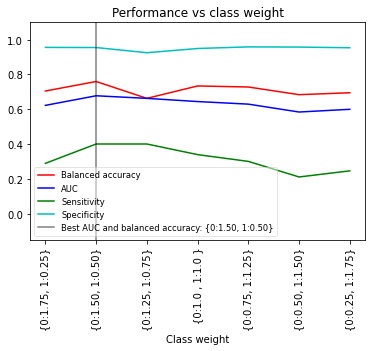

In [225]:
classweightlabel = ['{0:1.75, 1:0.25}', '{0:1.50, 1:0.50}', '{0:1.25, 1:0.75}', '{0:1.0 , 1:1.0 }', 
               '{0:0.75, 1:1.25}', '{0:0.50, 1:1.50}', '{0:0.25, 1:1.75}']

plt.plot(classweightlabel,bestscoresCWaccuracy, 'r' ,label = 'Balanced accuracy')
plt.plot(classweightlabel,bestscoresCWroc_auc, 'b' ,label = 'AUC')
plt.plot(classweightlabel,bestscoresCWsensitivity, 'g',label = 'Sensitivity')
plt.plot(classweightlabel,bestscoresCWspecificity,'c' ,label = 'Specificity')

plt.axvline('{0:1.50, 1:0.50}', 0.0, 1.0, label='Best AUC and balanced accuracy: {0:1.50, 1:0.50}', color="k", alpha=0.5)
#plt.axvline('{0:0.50, 1:1.50}', 0, 1, label='Best BA: {0:0.50, 1:1.50}', color="k", alpha=0.5)

#plt.scatter(classweightlabel, bestscoresCW)
plt.xlabel('Class weight')
plt.xticks(classweightlabel, rotation='vertical')
plt.ylabel('')
plt.ylim(-0.15, 1.1) 


plt.legend(loc='best',  fontsize='small', framealpha=0.5)

plt.title('Performance vs class weight')
plt.show()